In [2]:
#Adding last modified date
from datetime import datetime
from IPython.display import display, Markdown
todays_date = str(datetime.now().date())
time = str(str(datetime.now().time()))
author = "Keerthana Arun"
display(Markdown(f'Last modified on {todays_date} at {time} by {author}'))

Last modified on 2024-05-27 at 12:14:52.598406 by Keerthana Arun

## Understanding distribution of genes in real cell population - data from ClampFish 2.0

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import seaborn as sns


In [4]:
dataset = pd.read_csv("/Volumes/fsmresfiles/Basic_Sciences/CDB/GoyalLab/People/KeerthanaArun/grnInference/grnSimulationSetup/geneExpressionClamPish2.0.csv")

In [3]:
dataset

,cellID,segID,R1_YFP_UBC,R1_CY3_WNT5A,R1_A594_DDX58,R1_CY5_AXL,R2_YFP_UBC,R2_CY3_NGFR,R2_A594_FN1,R2_CY5_EGFR,R3_YFP_UBC,R3_CY3_ITGA3,R3_A594_MMP1,R3_CY5_MITF
0,14,14,147,5,2,7,231,9,204,3,237,68,2,121
1,17,17,80,1,1,3,158,1,46,2,225,67,5,226
2,20,20,51,0,20,4,48,2,40,0,54,21,0,16
3,28,28,55,1,0,0,101,7,56,2,118,55,8,107
4,36,36,42,0,11,4,22,1,34,0,57,32,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24680,253559,2233,20,20,1,33,21,5,186,4,22,70,52,11
24681,253573,2247,23,1,1,3,22,2,104,3,19,11,2,3
24682,253578,2252,39,16,2,33,36,10,187,3,37,71,33,16
24683,253590,2264,147,6,0,5,135,1,43,2,117,52,3,167


In [5]:
R1_YFP_UBC_dist = dataset["R1_YFP_UBC"]
R2_YFP_UBC_dist = dataset["R2_YFP_UBC"]
R3_YFP_UBC_dist	 = dataset["R3_YFP_UBC"]
R1_CY3_WNT5A_dist	 = dataset["R1_CY3_WNT5A"]
R1_A594_DDX58_dist	 = dataset["R1_A594_DDX58"]
R1_CY5_AXL_dist	 = dataset["R1_CY5_AXL"]
R2_CY3_NGFR_dist	 = dataset["R2_CY3_NGFR"]
R2_A594_FN1_dist	 = dataset["R2_A594_FN1"]
R2_CY5_EGFR =   dataset["R2_CY5_EGFR"]
R3_A594_MMP1_dist	 = dataset["R3_A594_MMP1"]
R3_CY5_MITF_dist	 = dataset["R3_CY5_MITF"]
R3_CY3_ITGA3 = dataset["R3_CY3_ITGA3"]


In [25]:
R3_YFP_UBC_dist

0        237
1        225
2         54
3        118
4         57
        ... 
24680     22
24681     19
24682     37
24683    117
24684     33
Name: R3_YFP_UBC, Length: 24685, dtype: int64

In [6]:
def plotDistribution(data):
    # Assuming 'data' contains your gene expression data
    # Fit the Log-Normal distribution to the data
    shape, loc, scale = lognorm.fit(data)  # Force loc to 0 if needed

    # Generate a range of values to plot the fitted distribution
    x = np.linspace(min(data), max(data), 10000)
    pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale)

    # Plot the histogram of the data with actual counts
    plt.figure(figsize=(10, 6))
    hist_counts, bin_edges, _ = plt.hist(data, bins=1000, density=False, alpha=0.5, color='g', label='Data Histogram')

    # Adjust the fitted curve to match the scale of the histogram
    # Calculate the bin widths
    bin_widths = np.diff(bin_edges)
    # Scale the PDF by the total counts and the bin widths to match the histogram's scale
    pdf_scaled = pdf_fitted * sum(hist_counts) * bin_widths[0]  # Assuming approximately equal bin widths

    # Plot the adjusted Log-Normal distribution
    plt.plot(x, pdf_scaled, 'r-', label='Fitted Log-Normal')

    plt.title('Fit of Log-Normal Distribution')
    plt.xlabel('Expression Level')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    # Calculate AIC for Log-Normal
    lognorm_aic = 2 * 3 - 2 * lognorm.logpdf(data, shape, loc=loc, scale=scale).sum()  # 3 parameters: shape, loc, scale
    print(f"Log-Normal AIC: {lognorm_aic}")

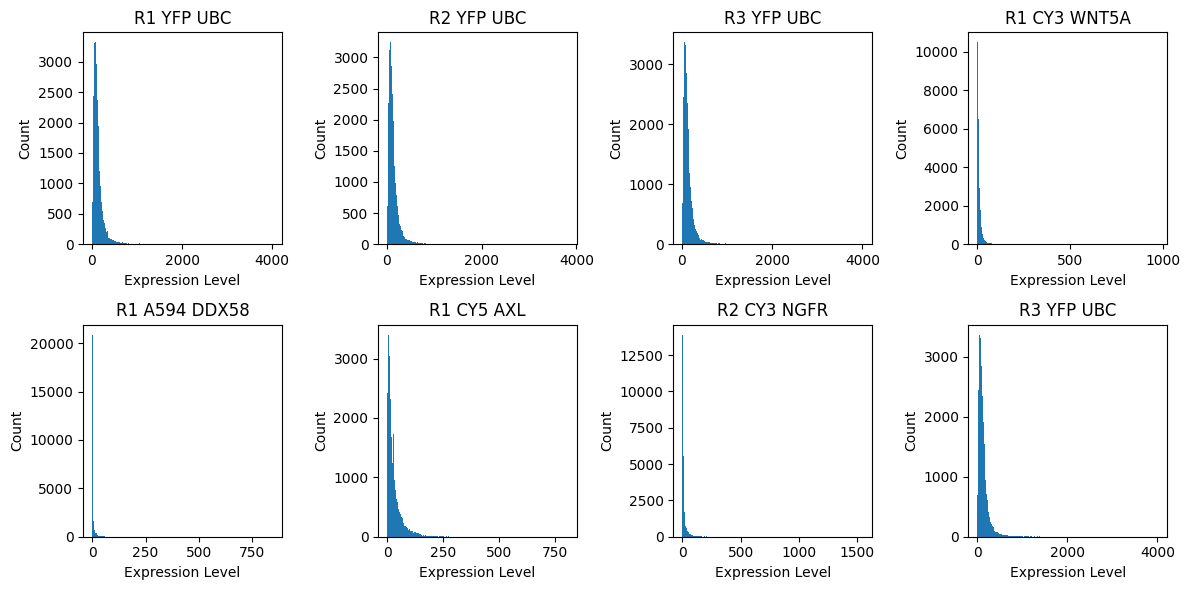

In [8]:
import matplotlib.pyplot as plt

# Assuming 'n_bins' is defined and the data arrays are correctly defined
n_bins = 200  # Example value, adjust as needed

# Create a 2x4 grid of subplots within a single figure
fig, axs = plt.subplots(2, 4, figsize=(12,6), tight_layout=True)

# Fill each subplot with histogram data and set titles
axs[0][0].hist(R1_YFP_UBC_dist, bins=n_bins)
axs[0][0].set_title('R1 YFP UBC')

axs[0][1].hist(R2_YFP_UBC_dist, bins=n_bins)
axs[0][1].set_title('R2 YFP UBC')

axs[0][2].hist(R3_YFP_UBC_dist, bins=n_bins)
axs[0][2].set_title('R3 YFP UBC')

axs[0][3].hist(R1_CY3_WNT5A_dist, bins=n_bins)
axs[0][3].set_title('R1 CY3 WNT5A')

axs[1][0].hist(R1_A594_DDX58_dist, bins=n_bins)
axs[1][0].set_title('R1 A594 DDX58')

axs[1][1].hist(R1_CY5_AXL_dist, bins=n_bins)
axs[1][1].set_title('R1 CY5 AXL')

axs[1][2].hist(R2_CY3_NGFR_dist, bins=n_bins)
axs[1][2].set_title('R2 CY3 NGFR')

axs[1][3].hist(R3_YFP_UBC_dist, bins=n_bins)
axs[1][3].set_title('R3 YFP UBC')

# Setting common labels for all subplots
for ax in axs.flat:
    ax.set(xlabel='Expression Level', ylabel='Count')

# Adjust layout to make room for titles
fig.tight_layout()

# Display the plot
plt.show()


R1_YFP_UBC
mean: 141.30690702855986, std: 149.4014574834229
R1_YFP_UBC: mean (mu) = 105.14, sigma = 0.74
R2_YFP_UBC
mean: 140.4860846668017, std: 148.49034445715853
R2_YFP_UBC: mean (mu) = 104.45, sigma = 0.74
R3_YFP_UBC
mean: 141.04136115049624, std: 148.34829176040523
R3_YFP_UBC: mean (mu) = 104.87, sigma = 0.74
R1_CY3_WNT5A
mean: 10.647032610897305, std: 19.607104567722974
R1_CY3_WNT5A: mean (mu) = 6.22, sigma = 1.06
R1_A594_DDX58
mean: 3.5194652623050438, std: 11.029821099712057
R1_A594_DDX58: mean (mu) = 2.49, sigma = 0.95
R1_CY5_AXL
mean: 31.38537573425157, std: 38.00372620166692
R1_CY5_AXL: mean (mu) = 18.61, sigma = 1.07
R2_CY3_NGFR
mean: 15.389993923435284, std: 34.68706978908612
R2_CY3_NGFR: mean (mu) = 7.42, sigma = 1.14
R2_A594_FN1
mean: 81.96159611099858, std: 74.52042053349057
R2_A594_FN1: mean (mu) = 60.38, sigma = 0.79
R3_A594_MMP1
mean: 19.417338464654648, std: 41.38686822189881
R3_A594_MMP1: mean (mu) = 7.30, sigma = 1.36
R3_CY5_MITF
mean: 111.63994328539599, std: 137

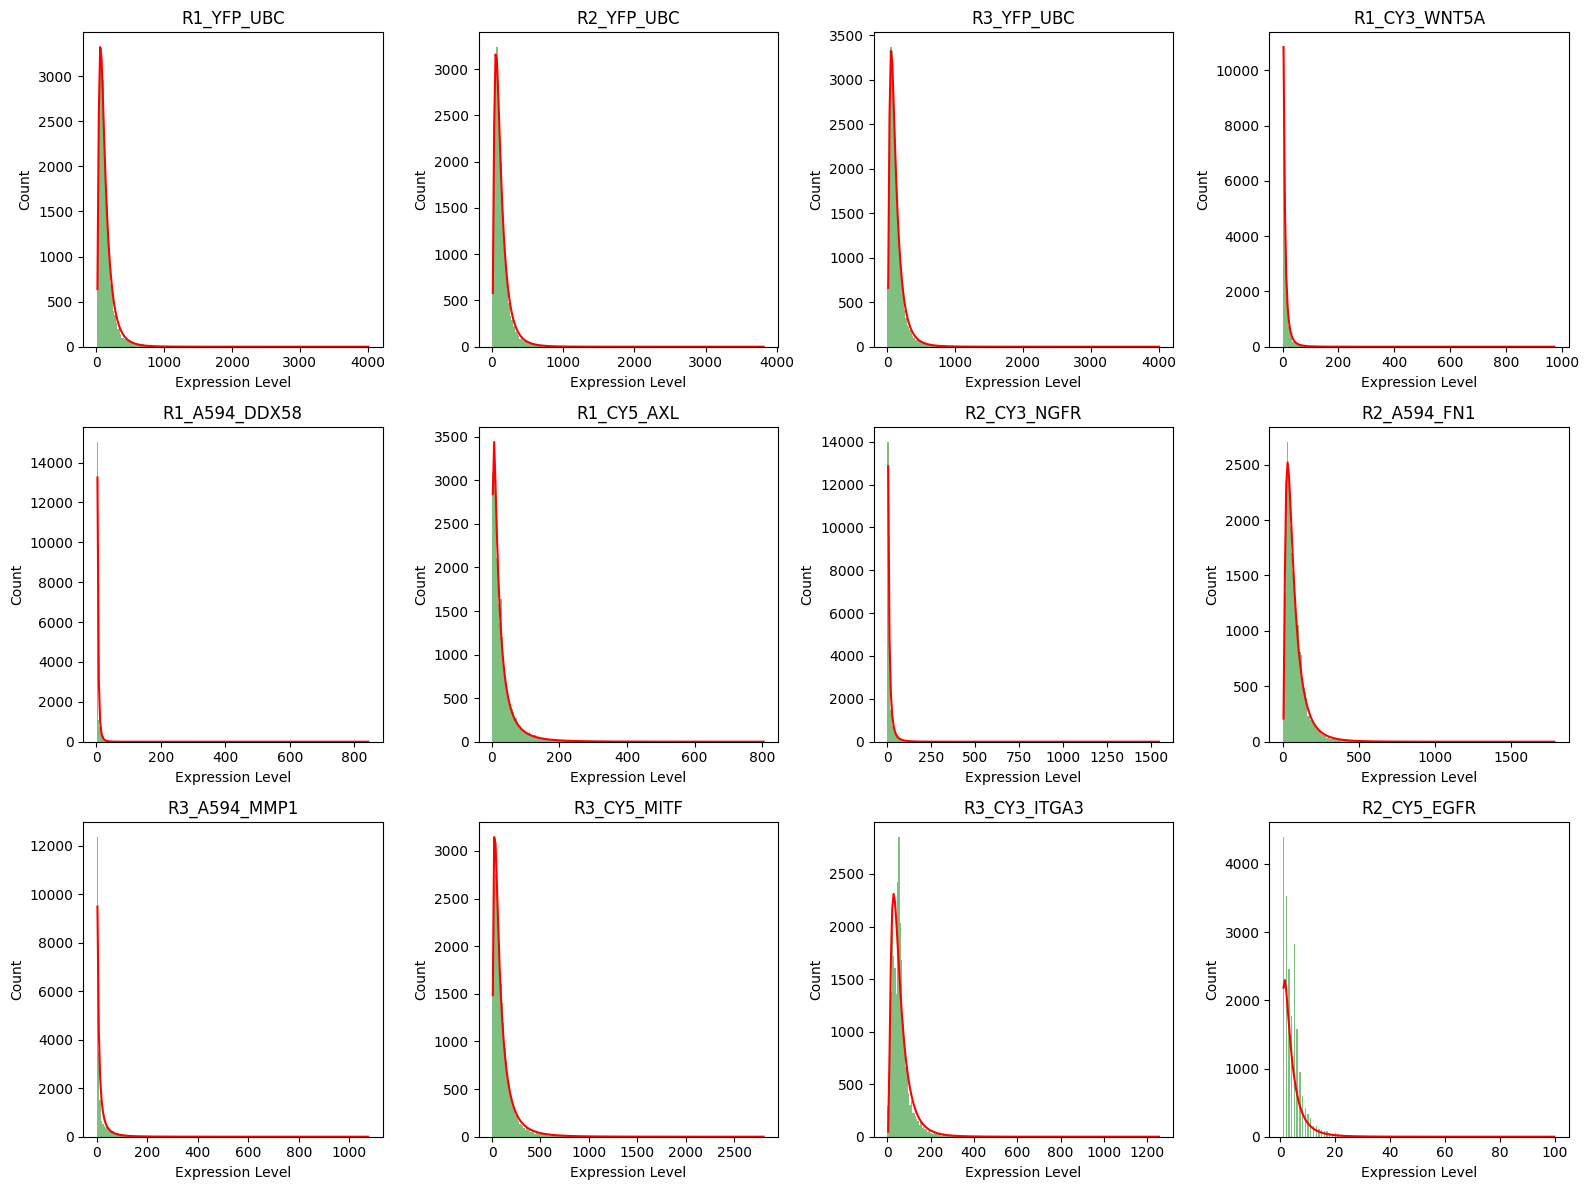

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Assuming datasets are defined as numpy arrays or similar iterable containers
datasets = [
    R1_YFP_UBC_dist, R2_YFP_UBC_dist, R3_YFP_UBC_dist, R1_CY3_WNT5A_dist, R1_A594_DDX58_dist, 
    R1_CY5_AXL_dist, R2_CY3_NGFR_dist, R2_A594_FN1_dist, R3_A594_MMP1_dist, R3_CY5_MITF_dist, R3_CY3_ITGA3,R2_CY5_EGFR
]
titles = [
    "R1_YFP_UBC", "R2_YFP_UBC", "R3_YFP_UBC", "R1_CY3_WNT5A",
    "R1_A594_DDX58", "R1_CY5_AXL", "R2_CY3_NGFR", "R2_A594_FN1",
    "R3_A594_MMP1", "R3_CY5_MITF", "R3_CY3_ITGA3","R2_CY5_EGFR"
]

fig, axs = plt.subplots(3, 4, figsize=(16, 12), tight_layout=True)
n_bins = 200

for ax, data, title in zip(axs.flat, datasets, titles):
    dataNp = np.array(data)
    print(title)
    mean = np.mean(dataNp)
    std = np.std(dataNp)
    print(f"mean: {mean}, std: {std}")
    if len(data[data > 0]) == 0:
        ax.text(0.5, 0.5, 'No positive data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(title)
        continue

    masked_data = data[data > 0]
    shape, loc, scale = lognorm.fit(masked_data, floc=0)  # Ensure location is zero

    mu = np.log(scale)  # Mean of log(data)
    sigma = shape        # Standard deviation of log(data)

    counts, bin_edges = np.histogram(masked_data, bins=n_bins)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_width = bin_edges[1] - bin_edges[0]
    area_histogram = np.sum(counts * bin_width)
    pdf = lognorm.pdf(bin_centers, sigma, loc=0, scale=np.exp(mu)) * sum(counts) * np.diff(bin_edges[:2])
    pdf_scaled = pdf * (area_histogram / np.sum(pdf * bin_width))

    ax.plot(bin_centers, pdf_scaled, 'r-', label='Log-Normal Fit')
    ax.hist(masked_data, bins=bin_edges, alpha=0.5, color='g')
    # ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel('Expression Level')
    ax.set_ylabel('Count')
    # ax.set_yscale('log')

    print(f"{title}: mean (mu) = {scale:.2f}, sigma = {shape:.2f}")

fig.tight_layout()
plt.show()


In [6]:
# %pip install fitter
import fitter
from fitter import Fitter

/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial

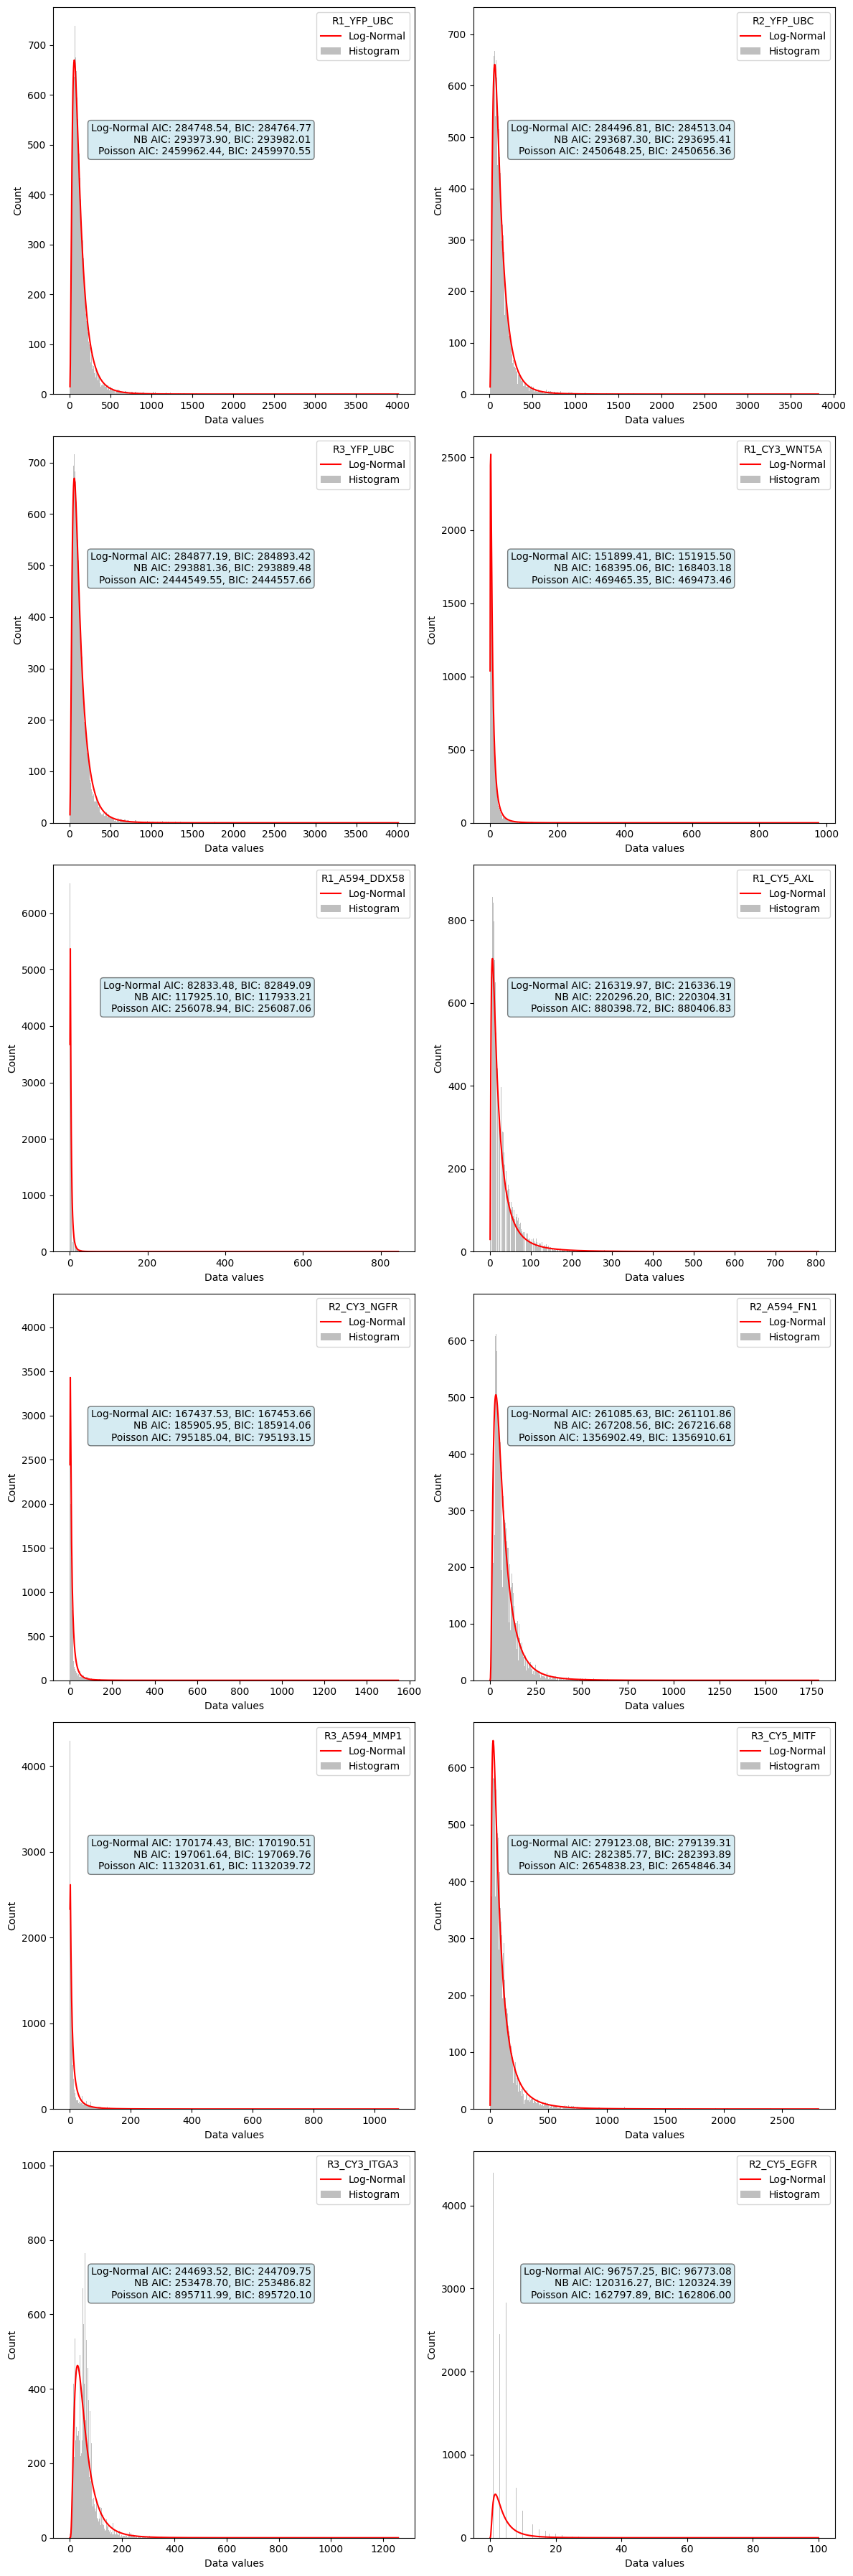

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, nbinom, poisson
from statsmodels.formula.api import glm
import statsmodels.api as sm

# Assuming 'datasets' are pre-defined lists of data arrays
datasets = [
    R1_YFP_UBC_dist, R2_YFP_UBC_dist, R3_YFP_UBC_dist, R1_CY3_WNT5A_dist, R1_A594_DDX58_dist, 
    R1_CY5_AXL_dist, R2_CY3_NGFR_dist, R2_A594_FN1_dist, R3_A594_MMP1_dist, R3_CY5_MITF_dist, R3_CY3_ITGA3, R2_CY5_EGFR
]
dataset_names = [
    "R1_YFP_UBC", "R2_YFP_UBC", "R3_YFP_UBC", "R1_CY3_WNT5A",
    "R1_A594_DDX58", "R1_CY5_AXL", "R2_CY3_NGFR", "R2_A594_FN1",
    "R3_A594_MMP1", "R3_CY5_MITF", "R3_CY3_ITGA3","R2_CY5_EGFR"
]


fig, axs = plt.subplots(6, 2, figsize=(12, 36))  # Adjust grid size based on the number of datasets
axs = axs.flatten()  # Flatten to 1D array for easier iteration

for index, ax in enumerate(axs):
    if index < len(datasets):
        data = datasets[index]
        data_positive = data[data > 0]
        mu_calculated = np.mean(np.log(data_positive))
        # Fit Log-Normal Distribution
        shape, loc, scale = lognorm.fit(data_positive, floc=0)
        bin_edges = np.linspace(min(data), max(data), 1000)
        hist_counts, bin_edges = np.histogram(data, bins=bin_edges)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        bin_width = np.diff(bin_edges)[0]

        # PDF for Log-Normal
        pdf_lognorm = lognorm.pdf(bin_centers, shape, loc, scale)
        pdf_scaled_lognorm = pdf_lognorm * hist_counts.sum() * bin_width

        # Calculate Log-Normal AIC and BIC
        log_likelihood_ln = np.sum(np.log(lognorm.pdf(data_positive, shape, loc, scale)))
        k = 2  # shape and scale
        aic_lognorm = 2 * k - 2 * log_likelihood_ln
        bic_lognorm = k * np.log(len(data_positive)) - 2 * log_likelihood_ln

        # Negative Binomial Fit
        data_counts = np.round(data)
        model_nb = glm('y ~ 1', data={'y': data_counts}, family=sm.families.NegativeBinomial()).fit()

        # Poisson Fit
        model_poisson = glm('y ~ 1', data={'y': data_counts}, family=sm.families.Poisson()).fit()
        lambda_poisson = np.mean(model_poisson.mu)
        max_data = int(max(data_counts))
        x_range = np.arange(0, max_data + 1)

        # Poisson PMF
        pmf_poisson = poisson.pmf(x_range, lambda_poisson)
        pmf_scaled_poisson = pmf_poisson * hist_counts.sum() * bin_width

        # Negative Binomial parameters and PMF calculation
        intercept = model_nb.params['Intercept']
        mean_nb = np.exp(intercept)
        dispersion = model_nb.scale
        size_nb = 1 / dispersion
        prob_nb = size_nb / (size_nb + mean_nb)
        pmf_nbinom = nbinom.pmf(x_range, size_nb, prob_nb)
        pmf_scaled_nbinom = pmf_nbinom * hist_counts.sum() * bin_width

        # Plotting the histogram and both fits
        ax.bar(bin_centers, hist_counts, width=bin_width, alpha=0.5, color='gray', label='Histogram')
        ax.plot(bin_centers, pdf_scaled_lognorm, 'r-', label='Log-Normal')
        # ax.plot(x_range, pmf_scaled_nbinom, 'b-', label='Negative Binomial')
        # ax.plot(x_range, pmf_scaled_poisson, 'g-', label='Poisson')
        ax.set_xlabel('Data values')
        ax.set_ylabel('Count')
        ax.legend(title=f'{dataset_names[index]}')

        # Adding AIC and BIC text within each subplot
        text_position_x = ax.get_xlim()[1] * 0.7
        text_position_y = ax.get_ylim()[1] * 0.7
        ax.text(text_position_x, text_position_y,
                f"Log-Normal AIC: {aic_lognorm:.2f}, BIC: {bic_lognorm:.2f}\n"
                f"NB AIC: {model_nb.aic:.2f}, BIC: {model_nb.bic_llf:.2f}\n"
                f"Poisson AIC: {model_poisson.aic:.2f}, BIC: {model_poisson.bic_llf:.2f}",
                fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()


/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial

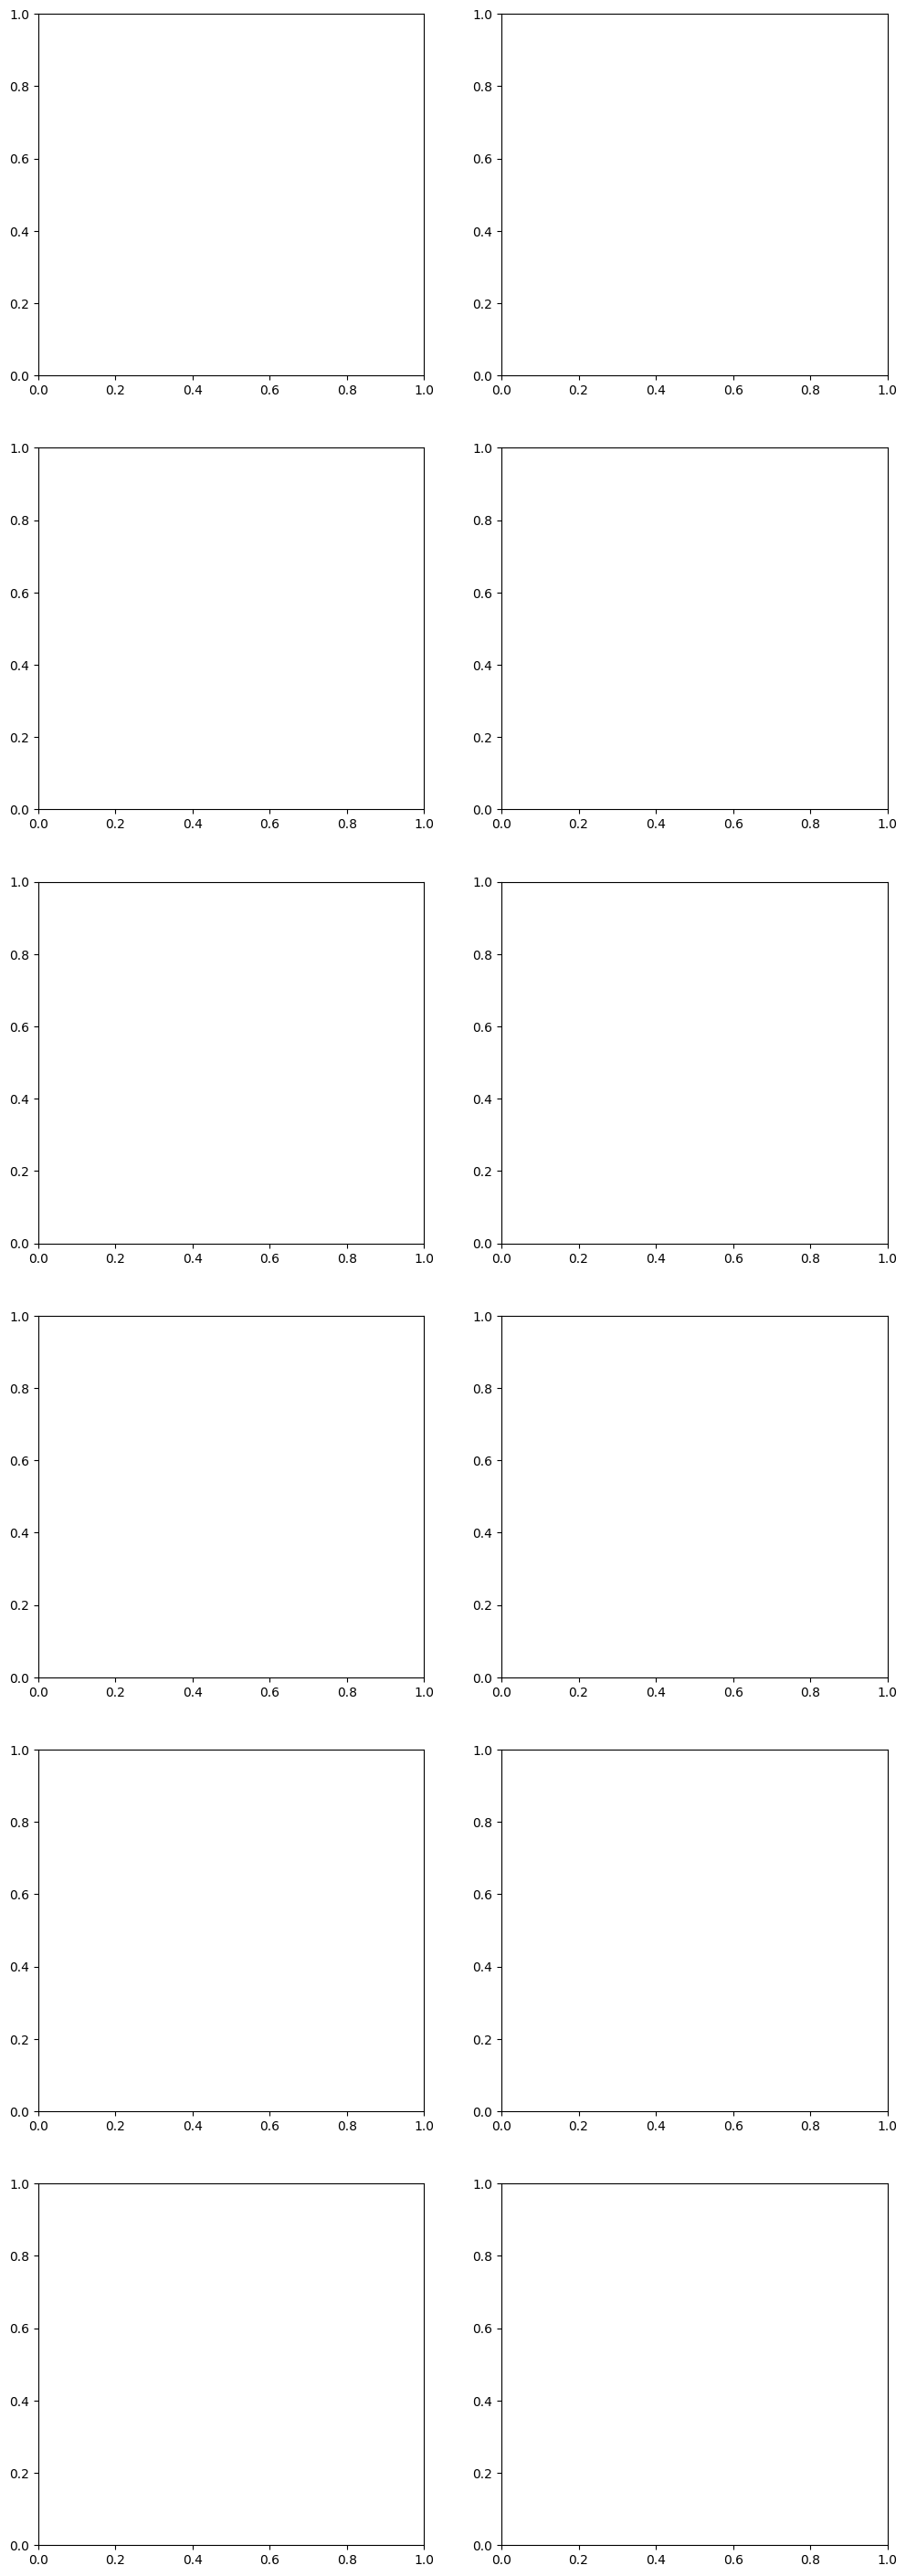

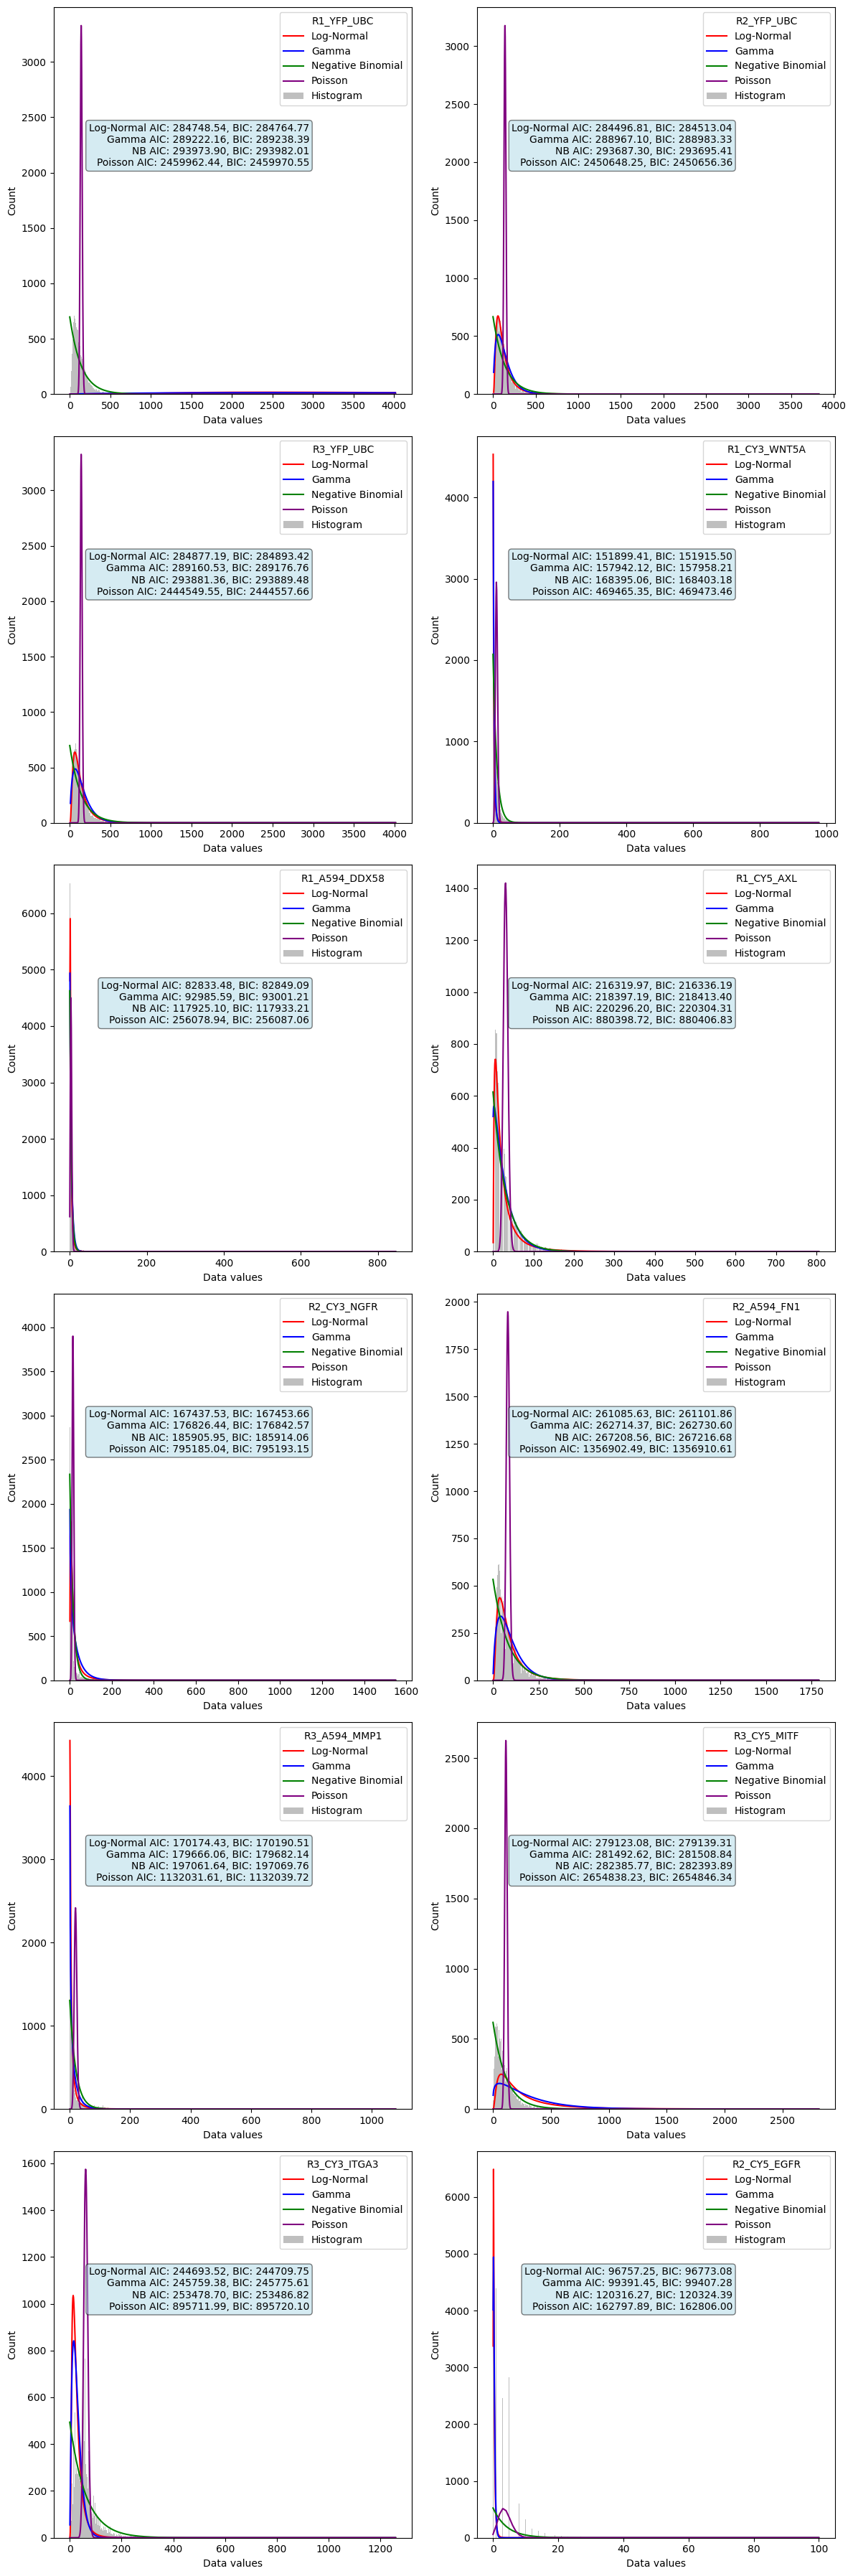

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, nbinom, poisson
from statsmodels.formula.api import glm
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gamma, nbinom, poisson, kstest
from statsmodels.formula.api import glm
import statsmodels.api as sm

# Assuming 'datasets' are pre-defined lists of data arrays
datasets = [
    R1_YFP_UBC_dist, R2_YFP_UBC_dist, R3_YFP_UBC_dist, R1_CY3_WNT5A_dist, R1_A594_DDX58_dist, 
    R1_CY5_AXL_dist, R2_CY3_NGFR_dist, R2_A594_FN1_dist, R3_A594_MMP1_dist, R3_CY5_MITF_dist, R3_CY3_ITGA3, R2_CY5_EGFR
]
dataset_names = [
    "R1_YFP_UBC", "R2_YFP_UBC", "R3_YFP_UBC", "R1_CY3_WNT5A",
    "R1_A594_DDX58", "R1_CY5_AXL", "R2_CY3_NGFR", "R2_A594_FN1",
    "R3_A594_MMP1", "R3_CY5_MITF", "R3_CY3_ITGA3", "R2_CY5_EGFR"
]

fig, axs = plt.subplots(6, 2, figsize=(12, 36))
axs = axs.flatten()

for index, ax in enumerate(axs):
    if index < len(datasets):
        import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gamma, nbinom, poisson
from statsmodels.formula.api import glm
import statsmodels.api as sm

# Assuming 'datasets' are pre-defined lists of data arrays
datasets = [
    R1_YFP_UBC_dist, R2_YFP_UBC_dist, R3_YFP_UBC_dist, R1_CY3_WNT5A_dist, R1_A594_DDX58_dist, 
    R1_CY5_AXL_dist, R2_CY3_NGFR_dist, R2_A594_FN1_dist, R3_A594_MMP1_dist, R3_CY5_MITF_dist, R3_CY3_ITGA3, R2_CY5_EGFR
]
dataset_names = [
    "R1_YFP_UBC", "R2_YFP_UBC", "R3_YFP_UBC", "R1_CY3_WNT5A",
    "R1_A594_DDX58", "R1_CY5_AXL", "R2_CY3_NGFR", "R2_A594_FN1",
    "R3_A594_MMP1", "R3_CY5_MITF", "R3_CY3_ITGA3", "R2_CY5_EGFR"
]

fig, axs = plt.subplots(6, 2, figsize=(12, 36))  # Adjust grid size based on the number of datasets
axs = axs.flatten()  # Flatten to 1D array for easier iteration

for index, ax in enumerate(axs):
    if index < len(datasets):
        data = datasets[index]
        data_positive = data[data > 0]
        mu_calculated = np.mean(np.log(data_positive))

        # Fit Log-Normal Distribution
        shape, loc, scale = lognorm.fit(data_positive, floc=0)
        pdf_lognorm = lognorm.pdf(bin_centers, shape, loc, scale)
        pdf_scaled_lognorm = pdf_lognorm * hist_counts.sum() * bin_width
        # Calculate Log-Normal AIC and BIC
        log_likelihood_ln = np.sum(np.log(lognorm.pdf(data_positive, shape, loc, scale)))
        k = 2  # shape and scale
        aic_lognorm = 2 * k - 2 * log_likelihood_ln
        bic_lognorm = k * np.log(len(data_positive)) - 2 * log_likelihood_ln
        # Fit Gamma Distribution
        alpha, loc_gamma, beta = gamma.fit(data_positive, floc=0)
        pdf_gamma = gamma.pdf(bin_centers, alpha, loc_gamma, beta)
        pdf_scaled_gamma = pdf_gamma * hist_counts.sum() * bin_width
        log_likelihood_gamma = np.sum(np.log(gamma.pdf(data_positive, alpha, loc, beta)))
        k = 2  # Parameters alpha and beta
        aic_gamma = 2 * k - 2 * log_likelihood_gamma
        bic_gamma = k * np.log(len(data_positive)) - 2 * log_likelihood_gamma
        # Histogram data
        bin_edges = np.linspace(min(data), max(data), 1000)
        hist_counts, bin_edges = np.histogram(data, bins=bin_edges)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        bin_width = np.diff(bin_edges)[0]

        # Negative Binomial Fit
        data_counts = np.round(data)
        model_nb = glm('y ~ 1', data={'y': data_counts}, family=sm.families.NegativeBinomial()).fit()

        # Poisson Fit
        model_poisson = glm('y ~ 1', data={'y': data_counts}, family=sm.families.Poisson()).fit()

        # Poisson and Negative Binomial PMF
        # Assuming `data_counts` is your dataset from which you fit the Poisson model
        lambda_poisson = np.mean(data_counts)  # Calculate the mean of the dataset for the Poisson parameter

        # Define the range for x based on the maximum observed count plus some buffer
        max_data = int(max(data_counts))
        x_range = np.arange(0, max_data + 1)

        # Calculate the PMF for Poisson distribution using the scalar mean rate `lambda_poisson`
        pmf_poisson = poisson.pmf(x_range, lambda_poisson)

        # Plotting PMF scaled to the histogram
        pmf_scaled_poisson = pmf_poisson * hist_counts.sum() * bin_width

        # This ensures that your x_range and pmf_poisson are aligned and correctly dimensioned for plotting


        intercept = model_nb.params['Intercept']
        mean_nb = np.exp(intercept)
        dispersion = model_nb.scale
        size_nb = 1 / dispersion
        prob_nb = size_nb / (size_nb + mean_nb)
        pmf_nbinom = nbinom.pmf(x_range, size_nb, prob_nb)
        pmf_scaled_nbinom = pmf_nbinom * hist_counts.sum() * bin_width

        # Plotting the histogram and all fits
        ax.bar(bin_centers, hist_counts, width=bin_width, alpha=0.5, color='gray', label='Histogram')
        ax.plot(bin_centers, pdf_scaled_lognorm, 'r-', label='Log-Normal')
        ax.plot(bin_centers, pdf_scaled_gamma, 'b-', label='Gamma')
        ax.plot(x_range, pmf_scaled_nbinom, 'g-', label='Negative Binomial')
        ax.plot(x_range, pmf_scaled_poisson, 'purple', label='Poisson')

        ax.set_xlabel('Data values')
        ax.set_ylabel('Count')
        ax.legend(title=f'{dataset_names[index]}')

        # Adding AIC and BIC text within each subplot
        text_position_x = ax.get_xlim()[1] * 0.7
        text_position_y = ax.get_ylim()[1] * 0.7
        ax.text(text_position_x, text_position_y,
        f"Log-Normal AIC: {aic_lognorm:.2f}, BIC: {bic_lognorm:.2f}\n"
        f"Gamma AIC: {aic_gamma:.2f}, BIC: {bic_gamma:.2f}\n"
        f"NB AIC: {model_nb.aic:.2f}, BIC: {model_nb.bic_llf:.2f}\n"
        f"Poisson AIC: {model_poisson.aic:.2f}, BIC: {model_poisson.bic_llf:.2f}",
        fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()



/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/Users/mzo5929/anaconda3/envs/grnSimulation/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial

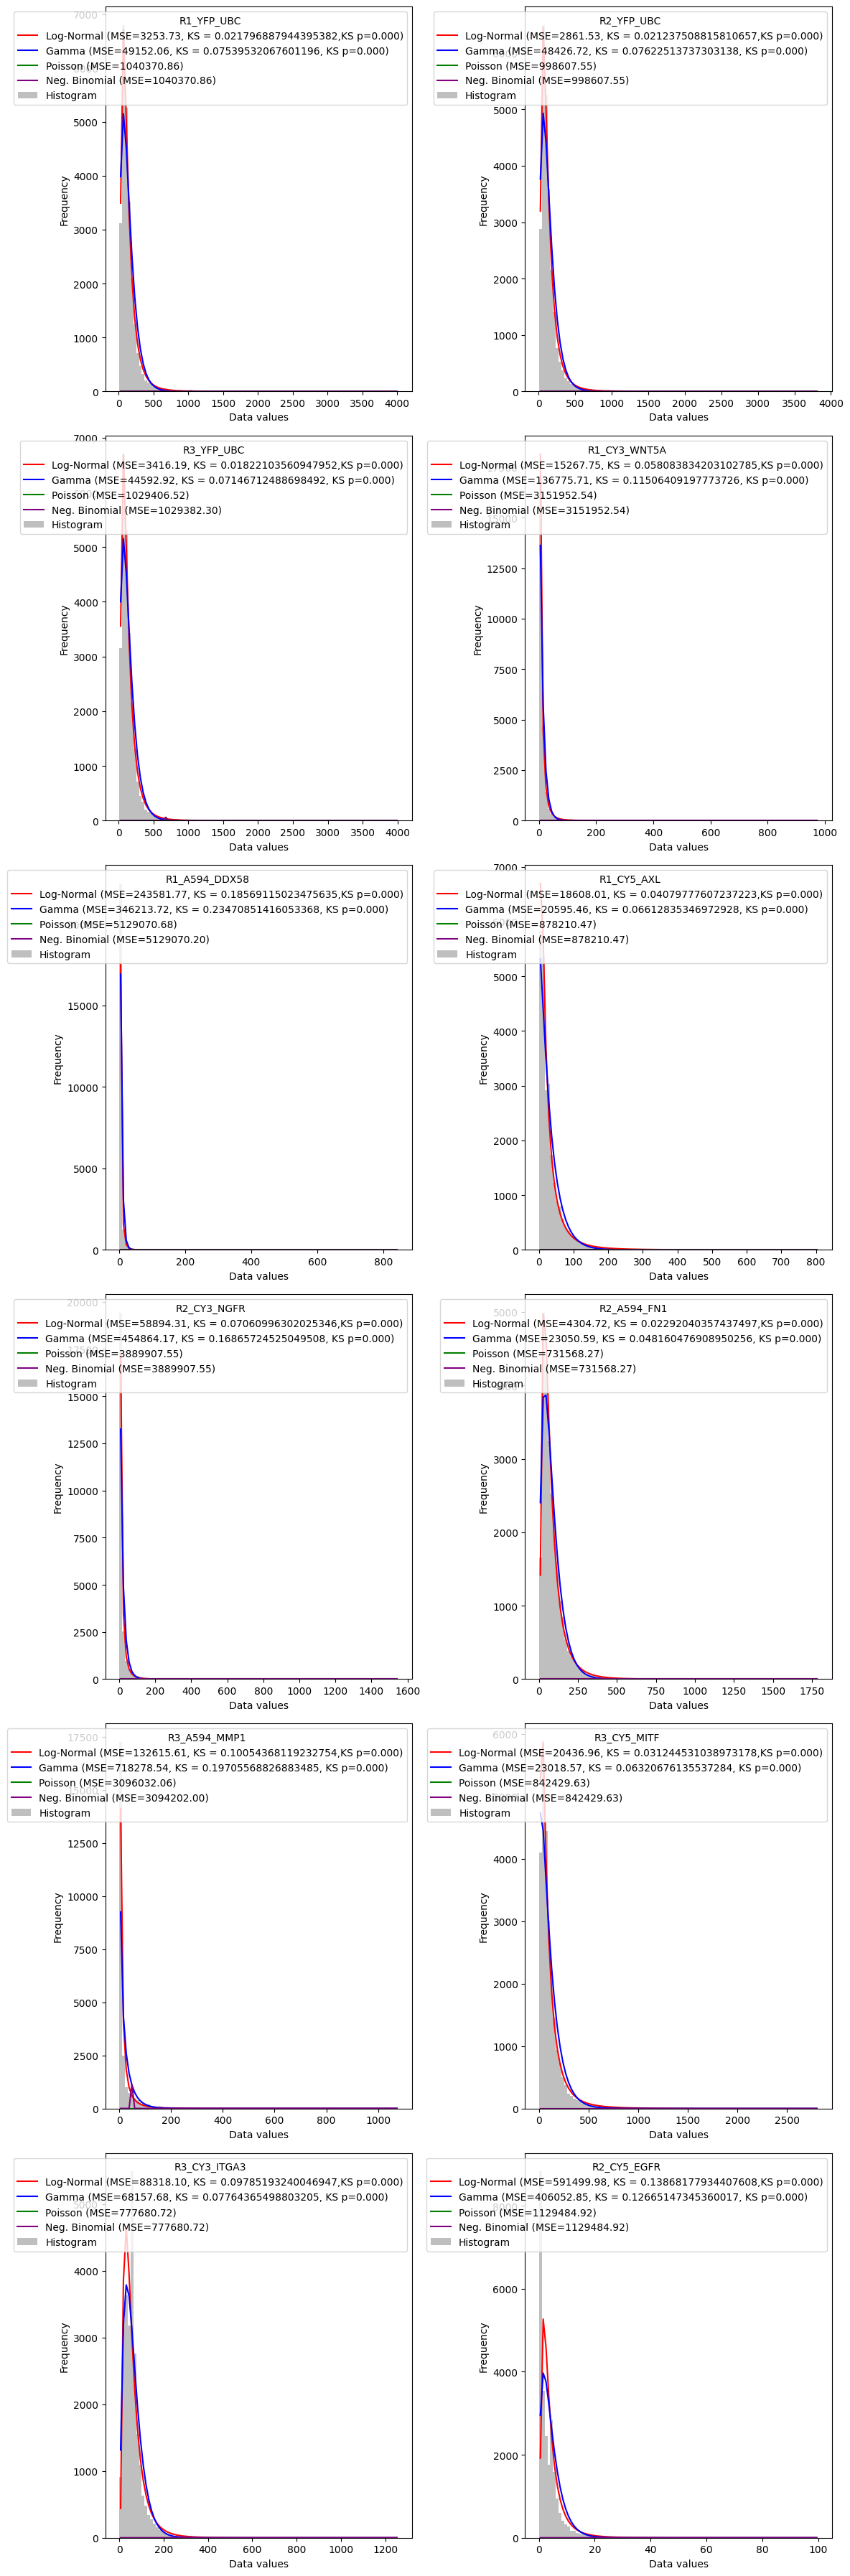

In [15]:
fig, axs = plt.subplots(6, 2, figsize=(12, 36))
axs = axs.flatten()

for index, ax in enumerate(axs):
    if index < len(datasets):
        data = datasets[index]
        data_positive = data[data > 0]
        data_counts = np.round(data)  # For count-based models like Poisson and Negative Binomial

        # Histogram data for MSE calculation and plotting
        bin_edges = np.linspace(min(data), max(data), 100)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        observed_freq, _ = np.histogram(data, bins=bin_edges)

        # Fit Log-Normal Distribution
        shape, loc, scale = lognorm.fit(data_positive, floc=0)
        pdf_lognorm = lognorm.pdf(bin_centers, shape, loc, scale)
        pdf_scaled_lognorm = pdf_lognorm * observed_freq.sum() * np.diff(bin_edges)
        mse_lognorm = np.mean((observed_freq - pdf_scaled_lognorm)**2)
        ks_stat_ln, ks_pvalue_ln = kstest(data_positive, 'lognorm', args=(shape, loc, scale))

        # Fit Gamma Distribution
        alpha, loc_gamma, beta = gamma.fit(data_positive, floc=0)
        pdf_gamma = gamma.pdf(bin_centers, alpha, loc_gamma, beta)
        pdf_scaled_gamma = pdf_gamma * observed_freq.sum() * np.diff(bin_edges)
        mse_gamma = np.mean((observed_freq - pdf_scaled_gamma)**2)
        ks_stat_gamma, ks_pvalue_gamma = kstest(data_positive, 'gamma', args=(alpha, loc_gamma, beta))

        # Fit Poisson Model
        # Fit Poisson Model
        model_poisson = glm('data_counts ~ 1', data={'data_counts': data_counts}, family=sm.families.Poisson()).fit()
        lambda_poisson = model_poisson.mu.mean()  # Use the mean predicted rate from the model

        # Poisson PMF
        pmf_poisson = poisson.pmf(bin_centers, lambda_poisson)
        pmf_scaled_poisson = pmf_poisson * observed_freq.sum() * np.diff(bin_edges)[0]

        mse_poisson = np.mean((observed_freq - pmf_scaled_poisson)**2)

        # Fit Negative Binomial Model
        model_nb = glm('data_counts ~ 1', data={'data_counts': data_counts}, family=sm.families.NegativeBinomial()).fit()
        mean_nb = np.exp(model_nb.params['Intercept'])
        dispersion = model_nb.scale
        size_nb = 1 / dispersion
        prob_nb = size_nb / (size_nb + mean_nb)
        pmf_nbinom = nbinom.pmf(bin_centers, size_nb, prob_nb)
        pmf_scaled_nbinom = pmf_nbinom * observed_freq.sum() * np.diff(bin_edges)
        mse_nbinom = np.mean((observed_freq - pmf_scaled_nbinom)**2)

        # Plotting the histogram and fits
        ax.bar(bin_centers, observed_freq, width=np.diff(bin_edges), alpha=0.5, color='gray', label='Histogram')
        ax.plot(bin_centers, pdf_scaled_lognorm, 'r-', label=f'Log-Normal (MSE={mse_lognorm:.2f}, KS = {ks_stat_ln},KS p={ks_pvalue_ln:.3f})')
        ax.plot(bin_centers, pdf_scaled_gamma, 'b-', label=f'Gamma (MSE={mse_gamma:.2f}, KS = {ks_stat_gamma}, KS p={ks_pvalue_gamma:.3f})')
        ax.plot(bin_centers, pmf_scaled_poisson, 'g-', label=f'Poisson (MSE={mse_poisson:.2f})')
        ax.plot(bin_centers, pmf_scaled_nbinom, 'purple', label=f'Neg. Binomial (MSE={mse_nbinom:.2f})')

        ax.set_xlabel('Data values')
        ax.set_ylabel('Frequency')
        ax.legend(title=dataset_names[index], loc='upper right')

plt.tight_layout()
plt.show()

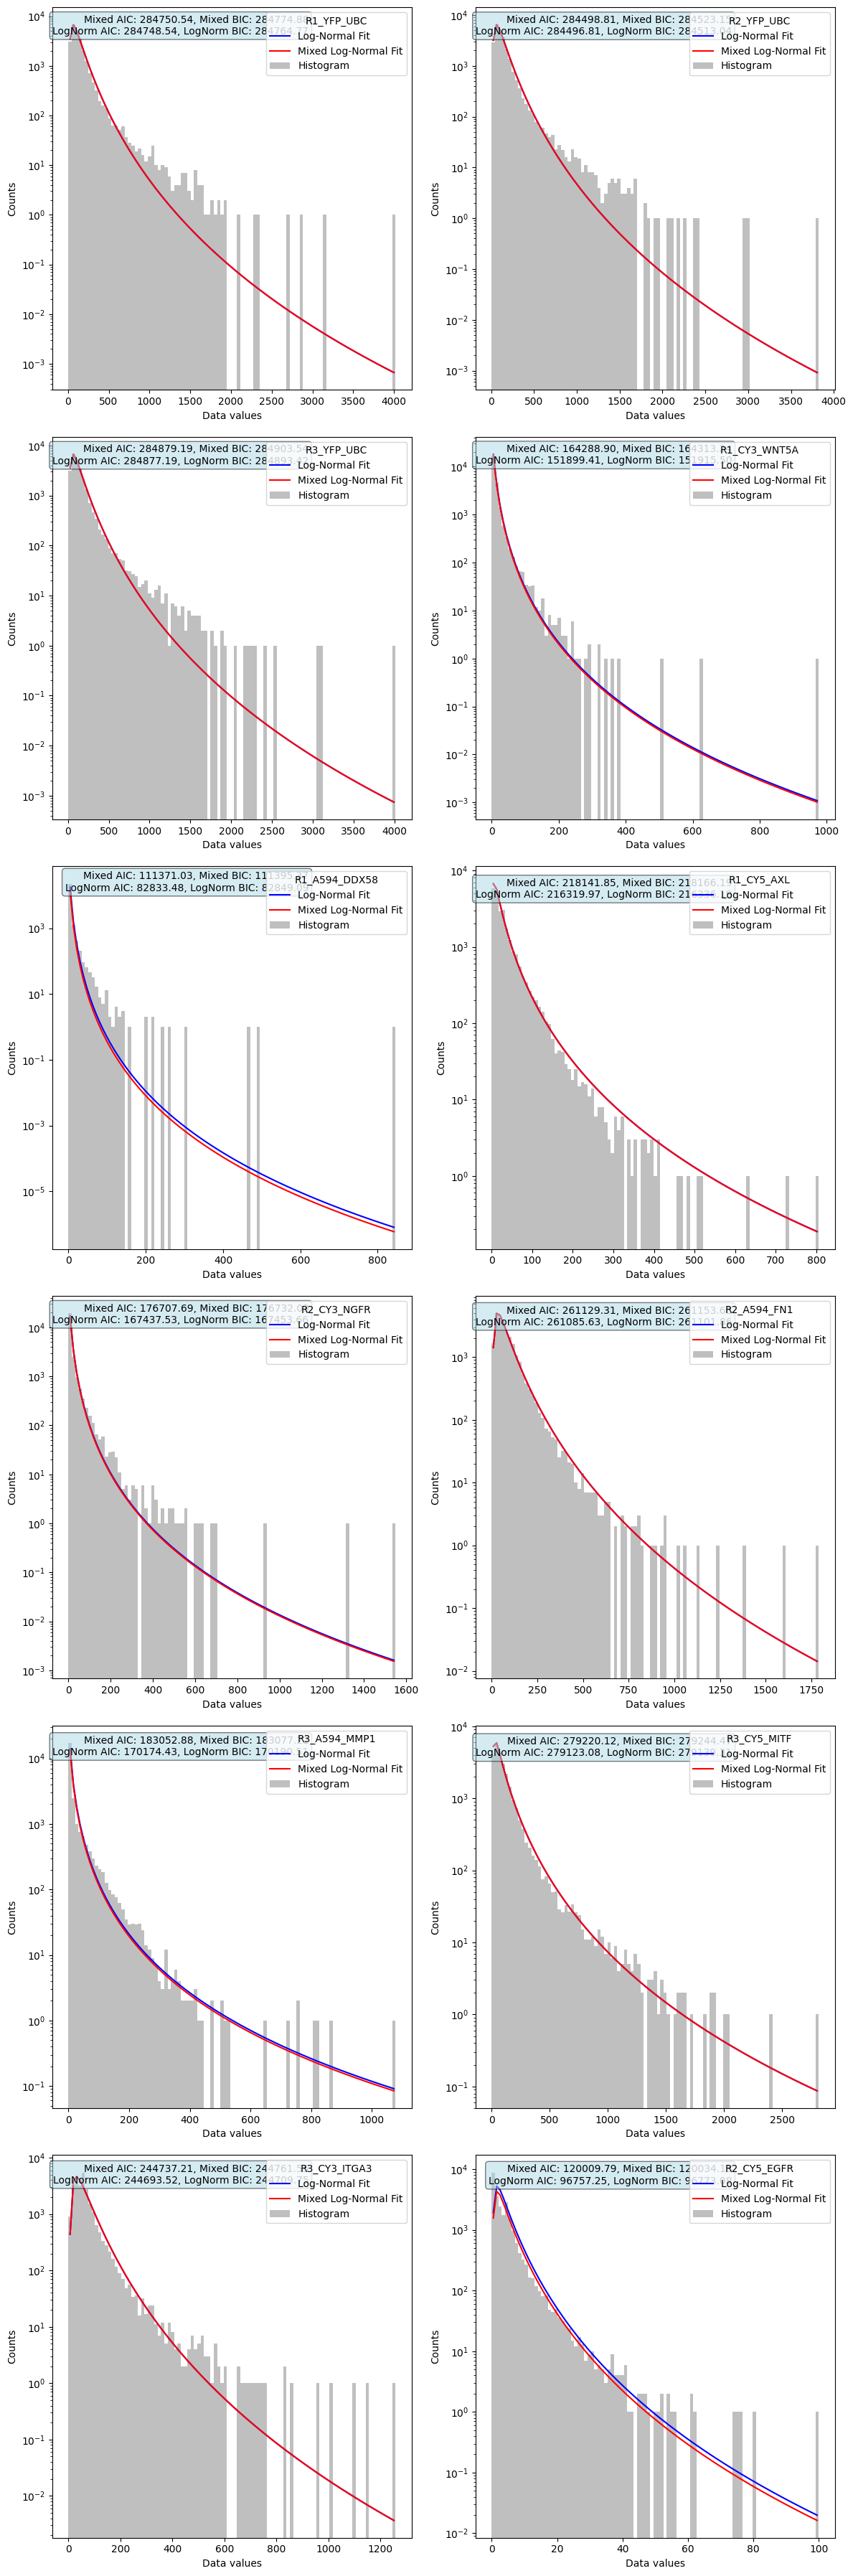

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Assuming 'datasets' and 'dataset_names' are defined as in the previous examples

fig, axs = plt.subplots(6, 2, figsize=(12, 36))  # Adjust grid size based on the number of datasets
axs = axs.flatten()  # Flatten to 1D array for easier iteration

for index, ax in enumerate(axs):
    if index < len(datasets):
        data = datasets[index]
        zero_proportion = np.mean(data == 0)
        data_positive = data[data > 0]

        # Fit Log-Normal Distribution to positive data
        shape, loc, scale = lognorm.fit(data_positive, floc=0)

        # Create bins and calculate histogram
        bin_edges = np.linspace(min(data), max(data), 100)
        hist_counts, _ = np.histogram(data, bins=bin_edges)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        
        # Calculate PDF for log-normal distribution
        pdf_lognorm = lognorm.pdf(bin_centers, shape, loc, scale)
        
        # Mixed PDF (combination of zeros and log-normal)
        pdf_mixed = zero_proportion * (bin_centers == 0).astype(float) + (1 - zero_proportion) * pdf_lognorm
        
        # Scale the mixed PDF to match the histogram counts
        pdf_mixed_scaled = pdf_mixed * len(data) * np.diff(bin_centers)[0]
        
        # Scale the log-normal PDF to match the histogram counts
        pdf_lognorm_scaled = pdf_lognorm * len(data) * np.diff(bin_centers)[0]

        # Plot histogram, log-normal PDF, and mixed PDF
        ax.bar(bin_centers, hist_counts, width=np.diff(bin_edges), alpha=0.5, color='gray', label='Histogram')
        ax.plot(bin_centers, pdf_lognorm_scaled, 'b-', label='Log-Normal Fit')
        ax.plot(bin_centers, pdf_mixed_scaled, 'r-', label='Mixed Log-Normal Fit')

        # Calculate log-likelihood for the mixed model
        log_likelihood_mixed = 0
        # Contributions from zero values
        if zero_proportion > 0 and np.any(data == 0):
            log_likelihood_mixed += np.sum(np.log(zero_proportion) * (data == 0))

        # Contributions from positive values
        if zero_proportion < 1 and np.any(data > 0):
            log_likelihood_mixed += np.sum(np.log(1 - zero_proportion) + lognorm.logpdf(data_positive, shape, loc, scale))

        # Calculate AIC and BIC for the mixed model
        n_params_mixed = 3  # shape, loc, zero_proportion
        n = len(data)
        aic_mixed = 2 * n_params_mixed - 2 * log_likelihood_mixed
        bic_mixed = np.log(n) * n_params_mixed - 2 * log_likelihood_mixed

        # Calculate log-likelihood for the log-normal model only
        log_likelihood_lognorm = np.sum(lognorm.logpdf(data_positive, shape, loc, scale))
        
        # Calculate AIC and BIC for the log-normal model
        n_params_lognorm = 2  # shape, loc
        aic_lognorm = 2 * n_params_lognorm - 2 * log_likelihood_lognorm
        bic_lognorm = np.log(len(data_positive)) * n_params_lognorm - 2 * log_likelihood_lognorm

        # Add labels and legend
        ax.set_xlabel('Data values')
        ax.set_ylabel('Counts')
        ax.legend(title=dataset_names[index])
        ax.set_yscale('log')
        # Adding AIC and BIC text within each subplot
        text_position_x = ax.get_xlim()[1] * 0.7
        text_position_y = ax.get_ylim()[1] * 0.7
        ax.text(text_position_x, text_position_y,
                f"Mixed AIC: {aic_mixed:.2f}, Mixed BIC: {bic_mixed:.2f}\nLogNorm AIC: {aic_lognorm:.2f}, LogNorm BIC: {bic_lognorm:.2f}",
                fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import ks_2samp, norm

# Sample data with zeros
# data = np.array([0, 1, 2, 3, 0, 4, 5, 0, 6, 7, 8, 0, 9, 10])

# Step 1: Adjust zeros by adding a small constant
constant = 0.000000  # Choose a small value that makes sense for your dataset
adjusted_data = data + constant

# Step 2: Apply the logarithmic transformation
log_data = np.log(adjusted_data)

# Step 3: Generate a normal distribution sample for comparison
# It should have the same mean and std deviation as the log-transformed data
norm_sample = norm.rvs(loc=np.mean(log_data), scale=np.std(log_data), size=len(log_data))

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(log_data, norm_sample)

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)


In [34]:
import numpy as np
import statsmodels.api as sm
from statsmodels.genmod.families.links import Log


# Example data - assuming 'data' is already defined and includes zeros
# data = np.array([...])  # Your actual data array

# Since there are no predictors, we use a constant term as the only predictor
X = np.ones((len(data), 1))  # Creates an array of ones

# Fit a GLM with a Tweedie family, suitable for zero-inflated continuous distributions
# The 'var_power' between (1, 2) lets the Tweedie resemble a compound Poisson-Gamma distribution, which can handle zeros.
glm_tweedie = sm.GLM(data, X, family=sm.families.Tweedie(var_power=1.5, link=Log()))
result = glm_tweedie.fit()

# Print the summary of the model
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             R1_CY5_AXL   No. Observations:                24685
Model:                            GLM   Df Residuals:                    24684
Model Family:                 Tweedie   Df Model:                            0
Link Function:                    Log   Scale:                          8.2145
Method:                          IRLS   Log-Likelihood:            -1.1814e+05
Date:                Wed, 22 May 2024   Deviance:                   1.3479e+05
Time:                        16:53:59   Pearson chi2:                 2.03e+05
No. Iterations:                     7   Pseudo R-squ. (CS):          1.221e-15
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4463      0.008    447.164      0.0

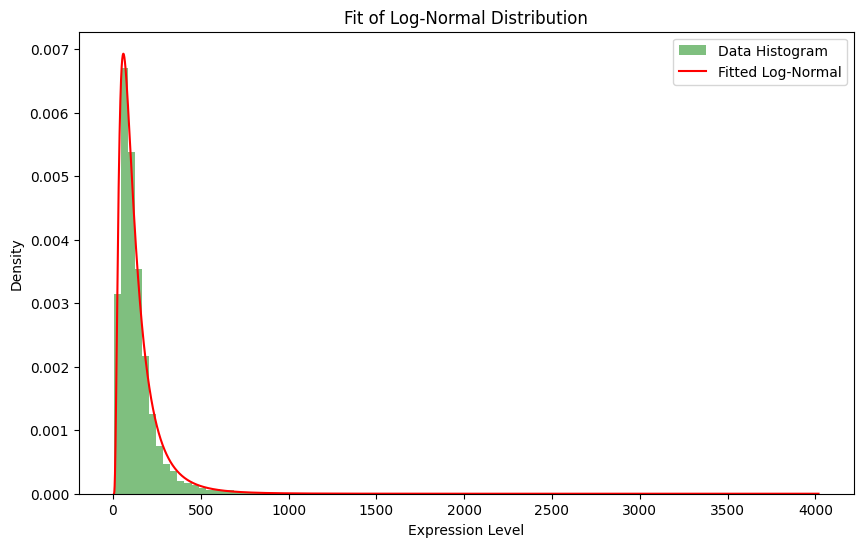

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Assuming 'data' is your dataset
data = np.array(R1_YFP_UBC_dist)

# Fitted parameters
sigma = 0.7668654270398062
loc = 3.318696415229466
scale = 100.77416394345332

# Create histogram of the data
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=100, density=True, alpha=0.5, color='g', label='Data Histogram')

# Generate some points to plot the fitted distribution
x = np.linspace(min(data), max(data), 10000)

# Calculate the PDF of the Log-Normal distribution
pdf = lognorm.pdf(x, sigma, loc, scale)

# Plot the PDF of the fitted Log-Normal distribution
plt.plot(x, pdf, 'r-', label='Fitted Log-Normal')

plt.title('Fit of Log-Normal Distribution')
plt.xlabel('Expression Level')
plt.ylabel('Density')
plt.legend()
plt.show()


finished fitting


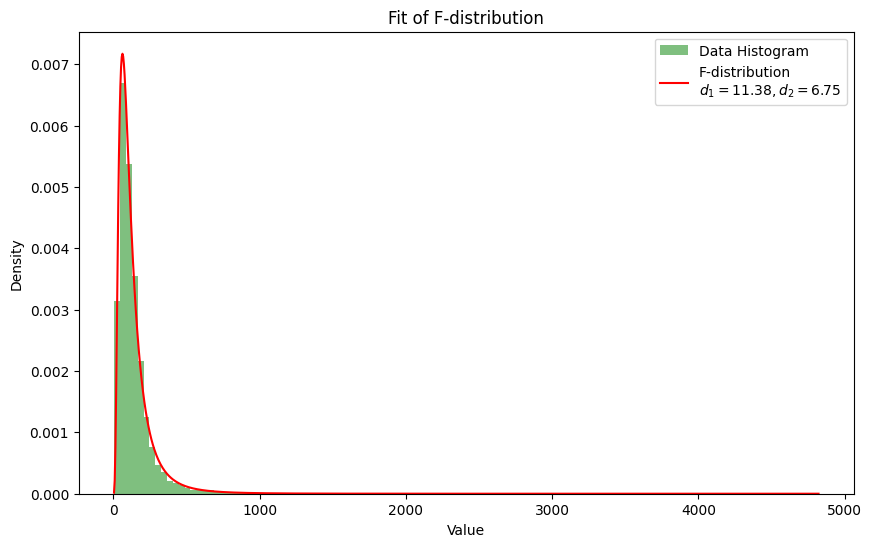

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Example parameters
d1 = 11.383383385875714
d2 = 6.752508129549266
loc = -0.18367842768287368
scale = 98.75672730669478

# Generate some x values, choosing a range that likely encompasses the transformed data
x_min = max(min(data) * 0.8, 0)  # Avoid negative values if data is positive
x_max = max(data) * 1.2
x = np.linspace(x_min, x_max, 1000)  # Adjust the range according to the fit and data

# Calculate the PDF using the F-distribution
pdf = f.pdf(x, d1, d2, loc, scale)

# Print notification that fitting is complete
print("finished fitting")

# Plot the PDF
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=100, density=True, alpha=0.5, color='g', label='Data Histogram')
plt.plot(x, pdf, 'r-', label=f'F-distribution\n$d_1={d1:.2f}, d_2={d2:.2f}$')
plt.title('Fit of F-distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
